In [2]:
import warnings
warnings.filterwarnings('ignore')

import joblib 
import pickle
from utils_test_2 import *


In [3]:
dataset =  pd.read_csv('/home/vinicius/UFERSA/cilab/euthyroid_diagnostic_support_app/tests/features/euthyroid_final_features.csv')
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'sex', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

In [4]:
model_stacking = joblib.load('/home/vinicius/UFERSA/cilab/euthyroid_diagnostic_support_app/models/StackingClassifier.sav')

In [9]:
output_model_stacking = model_stacking.predict(input_test)
print(output_model_stacking)

[1 0 1 ... 1 0 0]


In [5]:
accuracy(output_test, output_model_stacking)
precision(output_test, output_model_stacking) 
recall(output_test, output_model_stacking) 
f1(output_test, output_model_stacking)


A acurácia é de:  0.9878048780487805
A precisão é de:  0.9875
A pontuação de recall é de:  0.9875
A pontuação de F1 é de:  0.9875


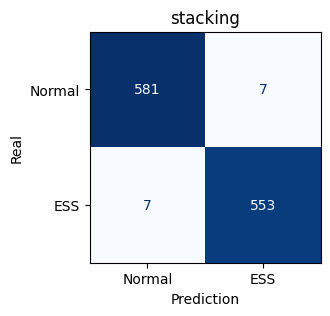

In [8]:
fig = plot_confusion_matrix(output_test, output_model_stacking, model_stacking, "stacking", labelx='Prediction', labely='Real', display_labels=['Normal', 'ESS'])
